# Overview
This repo explores risk assessment based on models, types, flight purpose within the aviation industry. 

# Background
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase

# Business problem
Objective : Determine which aircraft poses the lowest risk to the company based on historical data and other vital factors.

Why : Conducting a risk assessment analysis enables the company to understand risks associated with different aircrafts. This will ensure reduced accident occurence,safer operations, and maximization of investments in the aircraft venture

Key stakeholder : Head of New Aviation Division


# The Data
The data is pulled from:  [link](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses).
This dataset is  derived from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

# Data Preparation and Cleaning 
Objective
- Load files using python packages
- Review information about data and column
- Fix any missing or incorrect values and data structures
- Ensure wanted observations are well structured
 

## Importing our Libraries

In [646]:
# Importing the libraries we will need
# Importing the pandas library for data manipulation and analysis for tabular data
import pandas as pd
# Importing the numpy library for high level mathematical functions and arrays
import numpy as np
# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the Dataset from our CSV file

In [647]:
# We will start by reading the data from the CSV file and create the dataframe to be used
# To be able to read csv and avoid encoding error we use encoding i.e. "ISO-8859-1"(also known as "latin1")
# This enables handling of a wide range of characters.

data_source = pd.read_csv("AviationData.csv", encoding='latin1')

c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Previewing our Dataset

In [648]:
# Let first start by creating a copy of our dataset to avoid any unintended alterations to the original data.
df = data_source.copy( deep = True)

In [649]:
# Now lets have a snipet of how data looks like.
# Lets preview the data head, the first 5 rows 
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,37,-82,NaN,NaN,...,Personal,NaN,3,nan,nan,nan,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1,2,nan,0,VMC,Approach,Probable Cause,16-04-1980


In [650]:
# Lets also preview the tail, last 5 rows
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0,1,0,0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0,0,0,1,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0,0,0,0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0,1,0,1,NaN,NaN,NaN,30-12-2022


In [651]:
df.shape
# There is a total of 88889 rows and 31 columns in our dataset

(88889, 31)

In [652]:
# summary statistics for the numerical data in our dataset
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805,77488,76379,76956,82977
mean,1,1,0,0,5
std,0,5,2,2,28
min,0,0,0,0,0
25%,1,0,0,0,0
50%,1,0,0,0,1
75%,1,0,0,0,2
max,8,349,161,380,699


In [653]:
# summary of the categorical features in our dataset
df.describe(include = object)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,...,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10375,24871,...,2,13,31,3,26,13590,4,12,17075,2924
top,20001214X45071,Accident,DCA22WA172,2000-07-08,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [654]:
# Here we get more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [655]:
# Lets get the column names
df.keys()

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Cleaning our Dataset

In [656]:
# First we start with dropping columns that will not be useful for our analysis and answering of business questions

dropped_columns = ['Publication.Date','Report.Status','Amateur.Built',
                   'Registration.Number','Accident.Number']
df1 = df.drop(dropped_columns, axis = 1)

In [657]:
# Checking for missing values within the columns
df1.isna().sum()
# Exploring by what percentage each column has a missing value
col_missing_values = df1.isnull().sum().sort_values(ascending = False)
percent_missing = (df1.isnull().sum()/len(df1)).sort_values(ascending = False) * 100
# create a data frame for the % missing values 
dataframe_missing = pd.DataFrame({"Missing Values": col_missing_values, "Percentage(%)": percent_missing})
dataframe_missing[:10]

,Missing Values,Percentage(%)
Schedule,76307,86
Air.carrier,72241,81
FAR.Description,56866,64
Aircraft.Category,56602,64
Longitude,54516,61
Latitude,54507,61
Airport.Code,38640,43
Airport.Name,36099,41
Broad.phase.of.flight,27165,31
Total.Serious.Injuries,12510,14


In [658]:

# From the % missing values analysis,I dropped columns that have atleast 50% of the data missing and or
#  may not very critical for the analysis.
dropped_columns_1 = ['Latitude','Longitude','FAR.Description','Schedule','Air.carrier',
                     'Airport.Code','Airport.Name','Aircraft.Category']
df2 = df1.drop(dropped_columns_1,axis = 1)



In [659]:
# Removing any trailing spaces on columns 
df2.columns = df2.columns.str.strip()
# Changing the.dot in column names with an underscore
df2.columns = df2.columns.str.replace('\.','_')
df2.head(0)

,Event_Id,Investigation_Type,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight


In [660]:
# Checking to see the difference between the injuries columns
injury_col = df2[['Injury_Severity','Total_Fatal_Injuries','Total_Serious_Injuries',
           'Total_Minor_Injuries','Total_Uninjured']]
injury_col[:10]

# Observation is that Injury_Severity and Total_Fatal_Injuries are giving kind of similar info
#  thus we can merge the two columns into one to ensure we have minimal missing values as possible.

,Injury_Severity,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
0,Fatal(2),2,0,0,0
1,Fatal(4),4,0,0,0
2,Fatal(3),3,nan,nan,nan
3,Fatal(2),2,0,0,0
4,Fatal(1),1,2,nan,0
5,Non-Fatal,nan,nan,1,44
6,Fatal(4),4,0,0,0
7,Non-Fatal,0,0,0,2
8,Non-Fatal,0,0,0,2
9,Non-Fatal,0,0,3,0


In [661]:
# Lets add a new column mortality to enable merging of data from both Injury_Severity and Total_Fatal_Injuries
df2['Mortality'] = df2['Injury_Severity'].str.extract(r'\((\d+)\)')
df2['Mortality'].fillna(df2['Injury_Severity'],inplace = True)

In [662]:
# Replacing the non-numeric values in Mortality columns that did not result to a death with a 0.
df2['Mortality'].replace({'Non-Fatal': 0, 'Minor': 0, 'Serious': 0, 'Incident': 0}, inplace=True)

# Replacing fatal with values from Total fatal Injuries columns
df2.loc[df2['Injury_Severity'] == 'Fatal', 'Mortality'] = df2['Total_Fatal_Injuries']

# Replacing Unavailable with Nan
df2['Mortality'].replace('Unavailable', np.nan, inplace=True)

# Converting the Mortality column to integers.
df2['Mortality'] = df2['Mortality'].fillna(0).astype(int)
pd.options.display.float_format = '{:.0f}'.format

In [663]:
# Checking mortality column data types
df2.Mortality.dtypes

dtype('int32')

In [664]:
# Dropping Total_Injuries column as we created a new column with less missing values. 
# Remember the Total injuries column had 11,401 missing values.
df2.drop('Total_Fatal_Injuries', axis = 1, inplace = True)

In [665]:
# Lets format the Event_Date column to the correct format
df2['Event_Date'] = pd.to_datetime(df2['Event_Date'])
# Creating a year and column to help with analysis
df2 = df2.assign(Year=df2['Event_Date'].apply(lambda x: pd.to_datetime(x).year))
df2 = df2.assign(Month=df2['Event_Date'].apply(lambda m: pd.to_datetime(m).month))

In [666]:
# Lets create a new column state by extracting data from the location column
df2['State'] = df2['Location'].str.split(', ').str[1]

In [667]:
# When exploring aircraft Make column, I noticed data was in both upper and lower case.
# First lets change all to upper case
df2['Make'] = df2['Make'].str.upper()
# Next we strip all spaces if any
df2['Make'] = df2['Make'].str.replace(" ","")
# Get rid of any commas in Make column
df2['Make'] = df2['Make'].str.replace(" ,","")

In [668]:
# cleaning the Model columns

# First we change all to upper case
df2['Model'] = df2['Model'].str.upper()

# Let get rid of any special characters
df2['Model'] = df2['Model'].str.replace("-","").str.replace(".","").str.replace("/","")

# lets replace a date datatype observed in the Model column
def date_model(model):
    if (type(model) in {int, float}) and 1948 >= model <= 2025:
        return None  # Replace date-like entries
    return model

df2['Model'] = df2['Model'].apply(date_model)

# converting model to string datatypes
df2['Model'] = df2['Model'].astype(str)


In [669]:
# lets also convert the case for country and location columns
df2['Location'] = df2['Location'].str.upper()
df2['Country'] = df2['Country'].str.title()

In [670]:
# Noted weather condition has some lower cases, most are in uppercase in the data. 
# Lets change it to upper case
df2['Weather_Condition'] = df2['Weather_Condition'].str.upper()

In [671]:
# Lets make similar aircraft purposes into one. An example change Executive/corporate to business
df2['Purpose_of_flight'] = df2['Purpose_of_flight'].replace({'Executive/corporate':'Business', 
                                     'Aerial Observation':'Aerial Application',
                                     'Public Aircraft - Federal':'Public Aircraft',
                                     'Public Aircraft - Local':'Public Aircraft',
                                     'Public Aircraft - State':'Public Aircraft',}, regex=True)

### Checking for Accuracy & Completeness

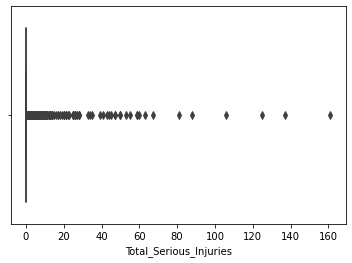

In [672]:
#We will check for outliers within the numerical dataset
sns.boxplot(x = df2['Total_Serious_Injuries'])
plt.show()

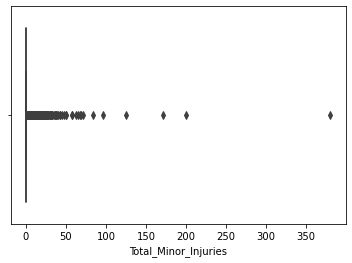

In [673]:
sns.boxplot(x = df2['Total_Minor_Injuries'])
plt.show()

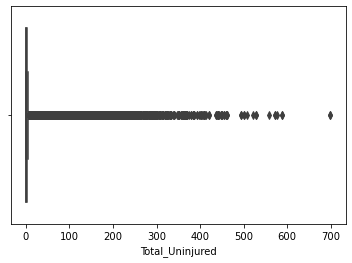

In [674]:
sns.boxplot(x = df2['Total_Uninjured'])
plt.show()

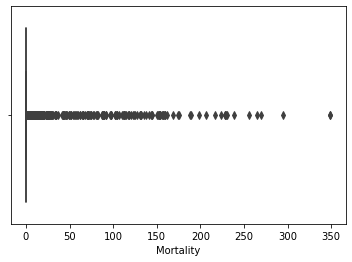

In [675]:
sns.boxplot(x = df2['Mortality'])
plt.show()

In [676]:
# From the boxplots we learn that:
    # Majority of events are right skewed
    # Majority of events have low number of each type of injury, 
    # however we have cases of outliers where the number of each type of event is much higher.
# Thus from the above we will not delete any outlier for the above reasons and also the fact that 
# each incident or accident will have different results when looking at Injuries caused and factors at play such as the no of passengers/size of aircraft.

In [677]:
# Checking for completeness of data
df2.isnull().sum()

# For the purposes of this particular analysis I will only drop rows where all the data is unaivailable
df2.dropna(axis = 0, how = "all")

,Event_Id,Investigation_Type,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Make,Model,Number_of_Engines,...,Purpose_of_flight,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Mortality,Year,Month,State
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,STINSON,1083,1,...,Personal,0,0,0,UNK,Cruise,2,1948,10,ID
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,PIPER,PA24180,1,...,Personal,0,0,0,UNK,Unknown,4,1962,7,CA
2,20061025X01555,Accident,1974-08-30,"SALTVILLE, VA",United States,Fatal(3),Destroyed,CESSNA,172M,1,...,Personal,nan,nan,nan,IMC,Cruise,3,1974,8,VA
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,ROCKWELL,112,1,...,Personal,0,0,0,IMC,Cruise,2,1977,6,CA
4,20041105X01764,Accident,1979-08-02,"CANTON, OH",United States,Fatal(1),Destroyed,CESSNA,501,nan,...,Personal,2,nan,0,VMC,Approach,1,1979,8,OH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,2022-12-26,"ANNAPOLIS, MD",United States,Minor,NaN,PIPER,PA28151,nan,...,Personal,1,0,0,NaN,NaN,0,2022,12,MD
88885,20221227106494,Accident,2022-12-26,"HAMPTON, NH",United States,NaN,NaN,BELLANCA,7ECA,nan,...,NaN,0,0,0,NaN,NaN,0,2022,12,NH
88886,20221227106497,Accident,2022-12-26,"PAYSON, AZ",United States,Non-Fatal,Substantial,AMERICANCHAMPIONAIRCRAFT,8GCBC,1,...,Personal,0,0,1,VMC,NaN,0,2022,12,AZ
88887,20221227106498,Accident,2022-12-26,"MORGAN, UT",United States,NaN,NaN,CESSNA,210N,nan,...,Personal,0,0,0,NaN,NaN,0,2022,12,UT


In [678]:
# Checking for duplicates
df2.duplicated().any() # Duplicates observed

# Dropping duplicates
df3 = df2.drop_duplicates(['Event_Id'], keep='last')
df3.shape

(87951, 21)

In [679]:
# Renaming dataframe columns to manageable names for easier analyis

Renamed_col = {'Event_Id':'ID','Event_Date':'Date',
               'Weather_Condition':'Weather',
               'Broad_phase_of_flight':'Phase_of_flight',}
df3.columns = [Renamed_col.get(col, col) for col in df3.columns]

# Changing all column names to upper case

df3.columns = map(lambda x: str(x).upper(), df3.columns)
df3.head(1)



,ID,INVESTIGATION_TYPE,DATE,LOCATION,COUNTRY,INJURY_SEVERITY,AIRCRAFT_DAMAGE,MAKE,MODEL,NUMBER_OF_ENGINES,...,PURPOSE_OF_FLIGHT,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED,WEATHER,PHASE_OF_FLIGHT,MORTALITY,YEAR,MONTH,STATE
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,STINSON,1083,1,...,Personal,0,0,0,UNK,Cruise,2,1948,10,ID


### Exporting the Cleaned Dataset


In [680]:
# Lets export our dataframe to a CSV file

df3.to_csv("Cleaned_Aviation_Data.csv", index = False)

# Exploratory Analysis and Visualization

In [681]:
df_data = pd.read_csv('Cleaned_Aviation_Data.csv')
df_data.head()

c:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,INVESTIGATION_TYPE,DATE,LOCATION,COUNTRY,INJURY_SEVERITY,AIRCRAFT_DAMAGE,MAKE,MODEL,NUMBER_OF_ENGINES,...,PURPOSE_OF_FLIGHT,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED,WEATHER,PHASE_OF_FLIGHT,MORTALITY,YEAR,MONTH,STATE
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,STINSON,1083,1,...,Personal,0,0,0,UNK,Cruise,2,1948,10,ID
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,PIPER,PA24180,1,...,Personal,0,0,0,UNK,Unknown,4,1962,7,CA
2,20061025X01555,Accident,1974-08-30,"SALTVILLE, VA",United States,Fatal(3),Destroyed,CESSNA,172M,1,...,Personal,nan,nan,nan,IMC,Cruise,3,1974,8,VA
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,ROCKWELL,112,1,...,Personal,0,0,0,IMC,Cruise,2,1977,6,CA
4,20041105X01764,Accident,1979-08-02,"CANTON, OH",United States,Fatal(1),Destroyed,CESSNA,501,nan,...,Personal,2,nan,0,VMC,Approach,1,1979,8,OH


In [682]:
df_data.keys()

Index(['ID', 'INVESTIGATION_TYPE', 'DATE', 'LOCATION', 'COUNTRY',
       'INJURY_SEVERITY', 'AIRCRAFT_DAMAGE', 'MAKE', 'MODEL',
       'NUMBER_OF_ENGINES', 'ENGINE_TYPE', 'PURPOSE_OF_FLIGHT',
       'TOTAL_SERIOUS_INJURIES', 'TOTAL_MINOR_INJURIES', 'TOTAL_UNINJURED',
       'WEATHER', 'PHASE_OF_FLIGHT', 'MORTALITY', 'YEAR', 'MONTH', 'STATE'],
      dtype='object')

In [683]:
# Grouping the dataframe by year, to check the contribution on the dataframe.

grouped_df = df_data.groupby('YEAR').count().reset_index()

sorted_df = grouped_df.sort_values(by ='YEAR',ascending = True)

sorted_df[:10]

,YEAR,ID,INVESTIGATION_TYPE,DATE,LOCATION,COUNTRY,INJURY_SEVERITY,AIRCRAFT_DAMAGE,MAKE,MODEL,...,ENGINE_TYPE,PURPOSE_OF_FLIGHT,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED,WEATHER,PHASE_OF_FLIGHT,MORTALITY,MONTH,STATE
0,1948,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1962,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1974,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,1,1,1,1,1
3,1977,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1979,2,2,2,2,2,2,2,2,2,...,1,1,1,1,2,2,2,2,2,2
5,1981,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,1982,3547,3547,3547,3547,3537,3547,3492,3540,3533,...,3547,3543,3520,3521,3539,3546,3545,3547,3547,3524
7,1983,3513,3513,3513,3511,3493,3513,3444,3513,3513,...,3512,3509,3497,3493,3504,3513,3506,3513,3513,3482
8,1984,3406,3406,3406,3404,3390,3406,3330,3406,3405,...,3406,3404,3389,3389,3398,3406,3403,3406,3406,3373
9,1985,3053,3053,3053,3052,3040,3053,3008,3053,3053,...,3053,3047,3041,3038,3039,3053,3046,3053,3053,3028


In [684]:
# By grouping by year, we observe that data collected/recorded between 1968 to 1981 was significantly less 
# across all categories and will not have any impact in our analysis if we choose to drop them

# Selecting years to focus on and dropping the years with insignificant dataset
df_year = df_data[df_data['YEAR'] >= 1982]

# Next lets explore  and look at which ones have significant records
df_year['COUNTRY'].value_counts()

# We learn that United States contributes 92.5% of the records when compared to other countries. 
# Countries like Brazil with the second highest records contributes only  0.4% of the dataset. 
# When compared to the data population we can choose to focus our analysis entirely on United states.

United States     81348
Brazil              373
Mexico              356
Canada              355
United Kingdom      341
                  ...  
Chad                  1
Scotland              1
Albania               1
Block 651A            1
Libya                 1
Name: COUNTRY, Length: 215, dtype: int64

In [685]:
# Lets have a look at the top 20 countries with the most records
top_20_countries = df_year['COUNTRY'].value_counts().index.to_list()[:20]
top_20_countries
# Top 10 countries will be 
top_10_countries = df_year['COUNTRY'].value_counts().index.to_list()[:10]

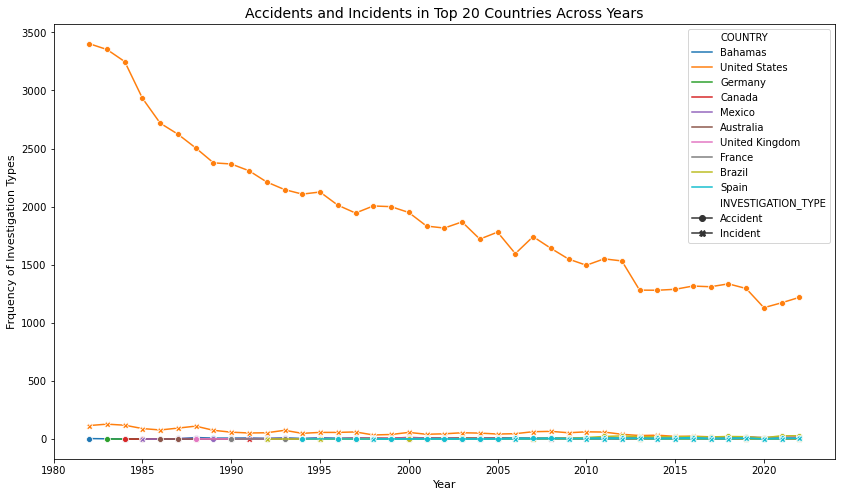

In [686]:
# Plotting a line graph for top 10 countries across years based on Investigation type 
# Start by filtering the data we want
filter_df = df_year[[country in top_10_countries for country in df_year['COUNTRY']]]
# Then Grouping by COUNTRY, YEAR AND INCIDENT TYPE
grouped_df = filter_df.groupby(['YEAR','COUNTRY','INVESTIGATION_TYPE']).agg(count=('INVESTIGATION_TYPE','count')).reset_index()


plt.figure(figsize=(14, 8))

sns.lineplot(data=grouped_df, x='YEAR', y='count', hue='COUNTRY', 
             style='INVESTIGATION_TYPE', markers=True, dashes=False)
plt.title('Accidents and Incidents in Top 20 Countries Across Years', fontsize=14)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Frquency of Investigation Types', fontsize=11)
plt.legend(bbox_to_anchor=(1, 1),loc='upper right')
plt.show()

In [687]:
# From the line graph we learn that USA still has the highest number of Accidents and Incidents recorded.
# Observed a decline in number of accidents and incidents overtime

## Key Business Questions
Recall our key objectives was to assess risks in the aviation space and come up with insights to enable decision making 
- Determine trends of aircraft safety over the years
- What is the accident frequency comparison between commercial and private aircraft?
- What is the safety performance of different aircraft models ovetime?
- Which aircraft models have the highest and lowest accident rates?
- What other factors contribute to accident rates?

In [688]:
# Due to United States having significantly large dataset. 
# We will use her to focus our analysis and answering of business questions.

In [689]:
df_year['COUNTRY'].unique()

array(['United States', nan, 'Gulf Of Mexico', 'Puerto Rico',
       'Atlantic Ocean', 'High Island', 'Bahamas', 'Missing', 'Pakistan',
       'Angola', 'Germany', 'Korea, Republic Of', 'Martinique',
       'American Samoa', 'Pacific Ocean', 'Canada', 'Bolivia', 'Mexico',
       'Dominica', 'Netherlands Antilles', 'Iceland', 'Greece', 'Guam',
       'Australia', 'Caribbean Sea', 'West Indies', 'Japan',
       'Philippines', 'Venezuela', 'Bermuda', 'San Juan Islands',
       'Colombia', 'El Salvador', 'United Kingdom',
       'British Virgin Islands', 'Netherlands', 'Costa Rica',
       'Mozambique', 'Jamaica', 'Panama', 'Guyana', 'Norway', 'Hong Kong',
       'Portugal', 'Malaysia', 'Turks And Caicos Islands',
       'Northern Mariana Islands', 'Dominican Republic', 'Suriname',
       'Honduras', 'Congo', 'Belize', 'Guatemala', 'Anguilla', 'France',
       'St Vincent And The Grenadines', 'Haiti', 'Montserrat',
       'Papua New Guinea', 'Cayman Islands', 'Sweden', 'Taiwan',
       'Se

In [705]:
# Lets start by creating  a dataframe for United States
df_USA = df_year[df_year['COUNTRY'] == 'United States']

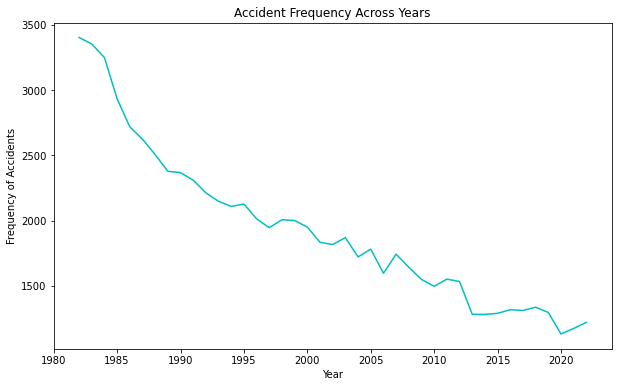

In [706]:
# Selecting Accidents as the investigation focus
USA_Accidents = df_USA[df_USA['INVESTIGATION_TYPE'] =='Accident']

# Plotting a line graph to answer the question of trends in aircraft safety overtime
Accidents_year = USA_Accidents.groupby('YEAR').agg(count=('YEAR','count')).reset_index()

plt.figure(figsize=(10,6))
plt.plot(Accidents_year['YEAR'],    Accidents_year['count'], linestyle='-', color='c')
plt.title('Accident Frequency Across Years')
plt.xlabel('Year')
plt.ylabel('Frequency of Accidents')
plt.show()


#####  Conclusion
 - Determine trends of aircraft safety over the years: 
 A general decrease in accidents has been observed across the years.

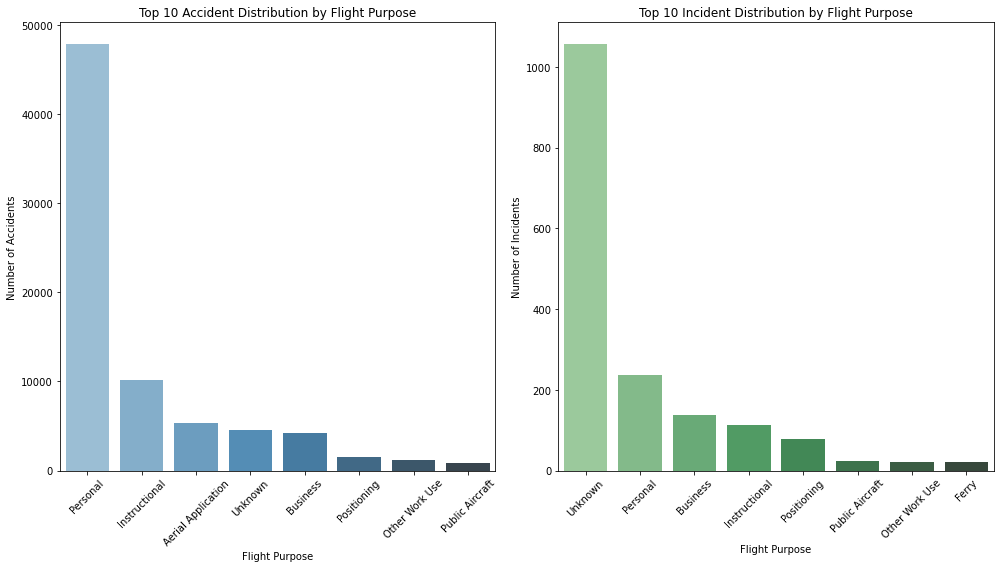

In [731]:
# What is the accident frequency comparison between commercial and private aircraft?
# We plot bar graphs to represent accidents and incidents for the different PURPOSE_OF_FLIGHT 
# start by selecting our data of interest and creating a new data frame
USA_Accidents = df_USA[df_USA['INVESTIGATION_TYPE'] =='Accident']
USA_Incidents = df_USA[df_USA['INVESTIGATION_TYPE'] =='Incident']

# Then group by flight purpose to get each of the purposes
Accidents_purpose = USA_Accidents.groupby('PURPOSE_OF_FLIGHT'
                                          ).agg(count=('PURPOSE_OF_FLIGHT','count')).reset_index()
Incidents_purpose = USA_Incidents.groupby('PURPOSE_OF_FLIGHT'
                                          ).agg(count=('PURPOSE_OF_FLIGHT','count')).reset_index()


# Then we sort values to get the top 8 contributors across each flight purpose
top_8_incidents = Incidents_purpose.sort_values(by='count', ascending=False).head(8)
top_8_accidents = Accidents_purpose.sort_values(by='count', ascending=False).head(8)

# We then visualise using seaborn advanced visuals
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

# Plotting top 10 accidents

sns.barplot(x='PURPOSE_OF_FLIGHT', y='count', data = top_8_accidents, 
    ax=axes[0], 
    palette='Blues_d'
)
axes[0].set_title('Top 10 Accident Distribution by Flight Purpose')
axes[0].set_xlabel('Flight Purpose')
axes[0].set_ylabel('Number of Accidents')
axes[0].tick_params(axis='x', rotation=45)

# Plot top 10 incidents
sns.barplot(x='PURPOSE_OF_FLIGHT', y='count', data = top_8_incidents, 
    ax=axes[1], 
    palette='Greens_d'
)
axes[1].set_title('Top 10 Incident Distribution by Flight Purpose')
axes[1].set_xlabel('Flight Purpose')
axes[1].set_ylabel('Number of Incidents')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()


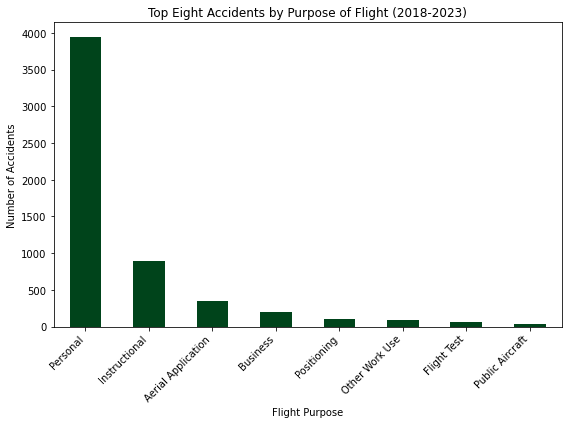

In [693]:
# What is the accident frequency comparison between commercial and private aircraft in the past 5 yrs?

# In our case we look at 2023 dating back to 2018 focussing only on accidents
# filtering out the recent years we want
recent_years = USA_Accidents[(USA_Accidents['YEAR'] >= 2018) & (USA_Accidents['YEAR'] <= 2023)]

# counting values for different flight purposes
flight_purpose_counts = recent_years['PURPOSE_OF_FLIGHT'].value_counts()

#selecting the top 8 purposes to plot a bar graph
top_8_purposes = flight_purpose_counts.head(8)

#plotting a bar graph
# we will use the .plot method

plt.figure(figsize=(8, 6))

top_8_purposes.plot(kind='bar', colormap='Greens_r')
plt.title('Top Eight Accidents by Purpose of Flight (2018-2023)')
plt.xlabel('Flight Purpose')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()


plt.show()



#####  Conclusion
 - What is the accident frequency comparison between commercial and private aircraft?
It is clear that the personal or private flights results to higher accidents and incidents when compared to business or commercial flights

- What is the accident frequency comparison between commercial and private aircraft in the past 5 yrs?
It is affirmed that private flights result to higher accidents when compared to commercial flights.


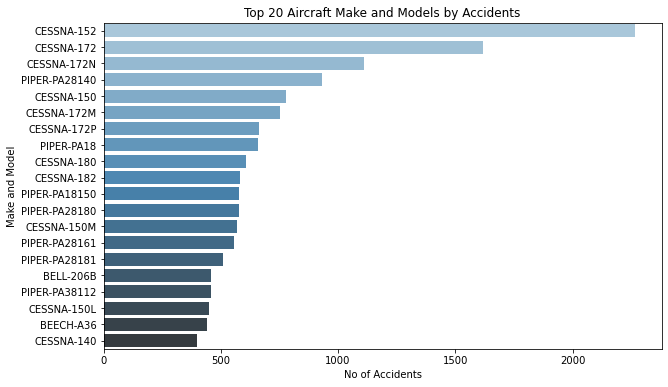

In [734]:
#What is the safety performance of different aircraft makes and models ovetime?

# Lets join the columns MAKE & MODEL to a new column name MAKE_MODEl 
df_USA = df_USA.assign(MAKE_MODEL = df_USA[['MAKE', 'MODEL']].astype(str).apply('-'.join, axis=1))

# Counting number of accidents and incidents by make & models
Make_model_accidents = USA_Accidents.groupby('MAKE_MODEL'
                                        ).agg(count=('MAKE_MODEL','count')).reset_index()
top_20_make_model = Make_model_accidents.sort_values(by='count', ascending=False).head(20)

# lets plot a graph for the Make and Models
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.barplot(x='count', y='MAKE_MODEL', data = top_20_make_model,
    palette='Blues_d'
)
axes.set_title('Top 20 Aircraft Make and Models by Accidents')
axes.set_xlabel('No of Accidents')
axes.set_ylabel('Make and Model')

plt.show()

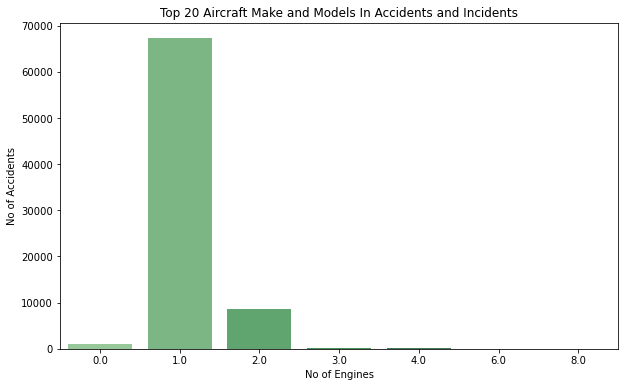

In [746]:

# Does the number of engines in an aeroplane pose a risk to involvement in an accident or incident?
Engine_accidents = USA_Accidents.groupby('NUMBER_OF_ENGINES'
                                        ).agg(count=('NUMBER_OF_ENGINES','count')).reset_index()
top_10_engine = Engine_accidents.sort_values(by='count', ascending=True).head(6)

# lets plot a graph for No of engines
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
sns.countplot(data = USA_Accidents,x='NUMBER_OF_ENGINES',
    palette='Greens_d'
)
axes.set_title('Top 20 Aircraft Make and Models In Accidents and Incidents')
axes.set_xlabel('No of Engines')
axes.set_ylabel('No of Accidents')

plt.show()

In [538]:
#Which aircraft models have the highest and lowest accident rates?


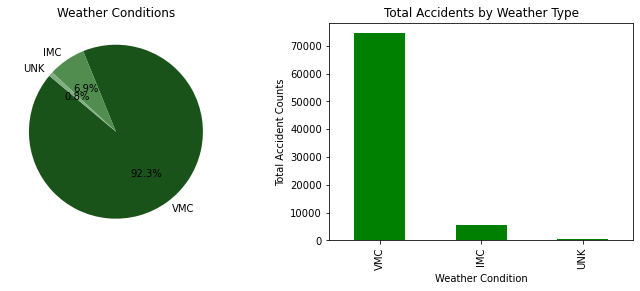

In [770]:
# What other factors contribute to accident rates? Does Weather condition affect accidents or incidents?
Weather_data = df_USA['WEATHER'].value_counts()
Weather_data

# plotting a pie chart to see the different weather conditions

colors = ['#1A5319','#508D4E','#80AF81']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].pie(Weather_data, labels = Weather_data.index, colors = colors,
            autopct='%1.1f%%',startangle = 140)
axes[0].set_title('Weather Conditions')

# plotting bar graph to show total accidents by weather type
Weather_data.plot(kind = 'bar', color ='Green',ax=axes[1])
axes[1].set_title("Total Accidents by Weather Type")
axes[1].set_xlabel("Weather Condition")
axes[1].set_ylabel('Total Accident Counts')

plt.show()

In [ ]:
# Exploring weather there is any colleration between the numerical columns
